In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import pandas as pd
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
MSFT = yf.Ticker('MSFT')
AAPL = yf.Ticker('AAPL')
GOOG = yf.Ticker('GOOG')
META = yf.Ticker('META')
AMZN = yf.Ticker('AMZN')


In [3]:
MSFT = MSFT.history(period='max')
AAPL = AAPL.history(period='max')
GOOG = GOOG.history(period='max')
META = META.history(period='max')
AMZN = AMZN.history(period='max')

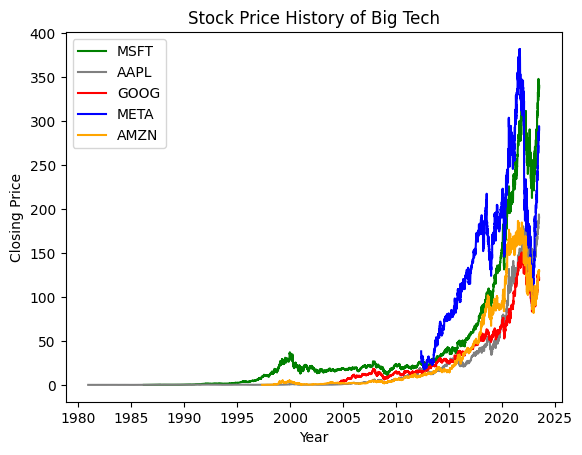

In [4]:
fig, ax = plt.subplots()
ax.plot(MSFT.index, MSFT['Close'], label='MSFT', color = 'green')
ax.plot(AAPL.index, AAPL['Close'], label='AAPL', color = 'gray') 
ax.plot(GOOG.index, GOOG['Close'], label='GOOG', color = 'red')
ax.plot(META.index, META['Close'], label='META', color = 'blue')
ax.plot(AMZN.index, AMZN['Close'], label='AMZN', color = 'orange')
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')
ax.set_title('Stock Price History of Big Tech')
ax.legend()

In [5]:
MSFT2012 = MSFT.loc['2012-06-01':].copy()
AAPL2012 = AAPL.loc['2012-06-01':].copy()
GOOG2012 = GOOG.loc['2012-06-01':].copy()
META2012 = META.loc['2012-06-01':].copy()
AMZN2012 = AMZN.loc['2012-06-01':].copy() 


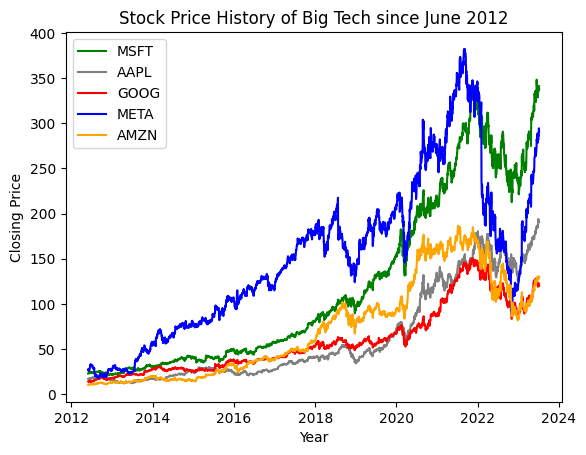

In [6]:
fig, ax = plt.subplots()
ax.plot(MSFT2012.index, MSFT2012['Close'], label='MSFT', color = 'green')
ax.plot(AAPL2012.index, AAPL2012['Close'], label='AAPL', color = 'gray') 
ax.plot(GOOG2012.index, GOOG2012['Close'], label='GOOG', color = 'red')
ax.plot(META2012.index, META2012['Close'], label='META', color = 'blue')
ax.plot(AMZN2012.index, AMZN2012['Close'], label='AMZN', color = 'orange')
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')
ax.set_title('Stock Price History of Big Tech since June 2012')
ax.legend()

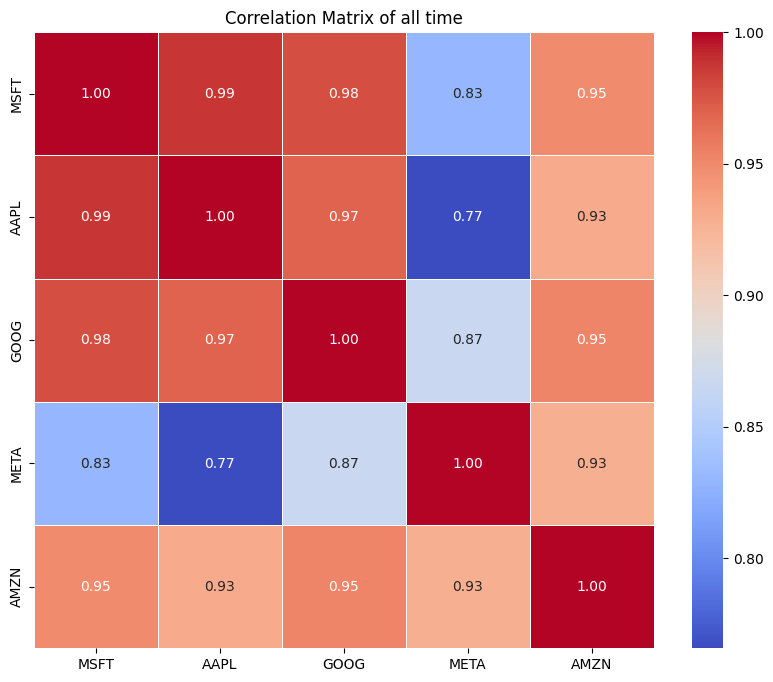

In [7]:

df = pd.concat([MSFT['Close'], AAPL['Close'], GOOG['Close'], META['Close'], AMZN['Close']], axis=1)
df.columns = ['MSFT', 'AAPL', 'GOOG', 'META', 'AMZN']

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of all time')
plt.show()



In [8]:
MSFTprices = yf.download('MSFT', start='2023-01-01', end='2023-07-01').Close
AAPLprices = yf.download('AAPL', start='2023-01-01', end='2023-07-01').Close
GOOGprices = yf.download('GOOG', start='2023-01-01', end='2023-07-01').Close
METAprices= yf.download('META', start='2023-01-01', end='2023-07-01').Close
AMZNprices = yf.download('AMZN', start='2023-01-01', end='2023-07-01').Close

MSFTreturns = MSFTprices.pct_change().dropna()
AAPLreturns = AAPLprices.pct_change().dropna()
GOOGreturns = GOOGprices.pct_change().dropna()
METAreturns = METAprices.pct_change().dropna()
AMZNreturns = AMZNprices.pct_change().dropna()




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


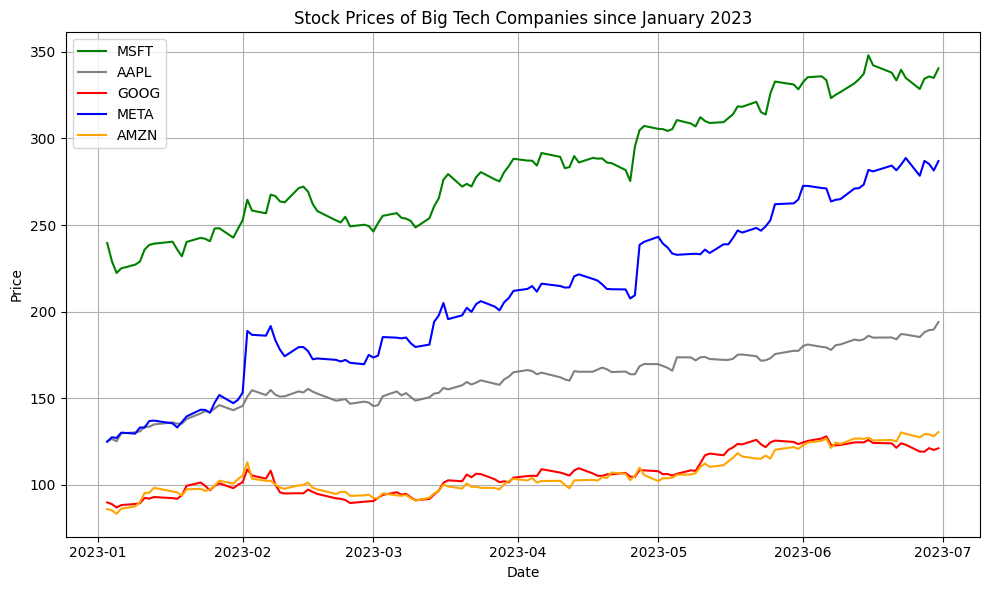

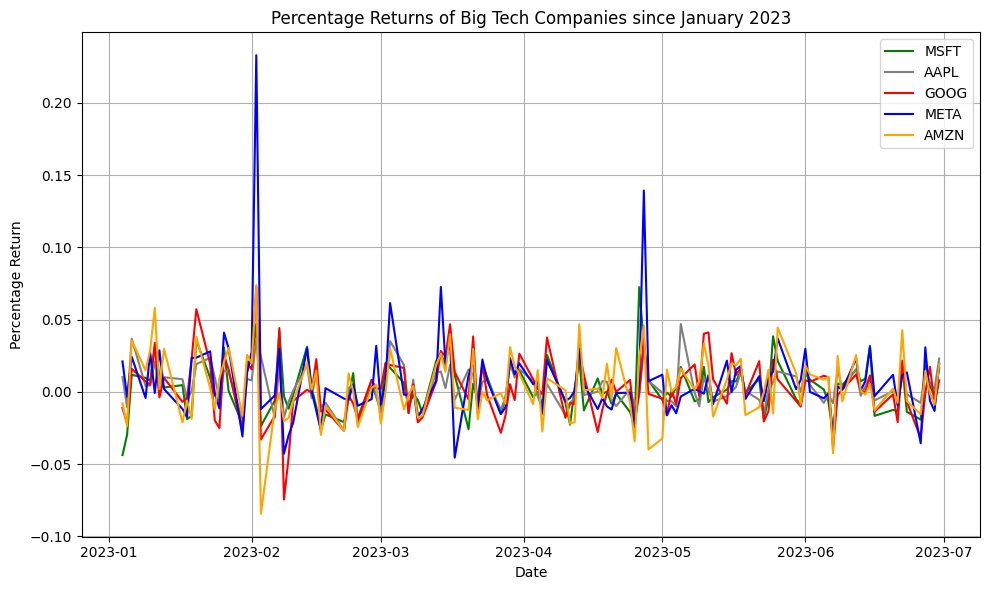

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(MSFTprices.index, MSFTprices, label='MSFT', color='green')
plt.plot(AAPLprices.index, AAPLprices, label='AAPL', color='gray')
plt.plot(GOOGprices.index, GOOGprices, label='GOOG', color='red')
plt.plot(METAprices.index, METAprices, label='META', color='blue')
plt.plot(AMZNprices.index, AMZNprices, label='AMZN', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices of Big Tech Companies since January 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(MSFTreturns.index, MSFTreturns, label='MSFT', color='green')
plt.plot(AAPLreturns.index, AAPLreturns, label='AAPL', color='gray')
plt.plot(GOOGreturns.index, GOOGreturns, label='GOOG', color='red')
plt.plot(METAreturns.index, METAreturns, label='META', color='blue')
plt.plot(AMZNreturns.index, AMZNreturns, label='AMZN', color='orange')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.title('Percentage Returns of Big Tech Companies since January 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
            

In [10]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2022,1,1)
